# 研究环境介绍

研究环境由IPython笔记本提供支持，它允许执行大量的数据分析和统计验证。我们将在这里演示一些简单的技术。

## 代码单元格与文本单元格

正如您所看到的，每个单元格可以是代码，也可以是文本。要在它们之间进行选择，请从左上角的“单元格类型”下拉菜单中进行选择。

## 执行一个命令

当您按play或按快捷键shift-enter时，代码单元格将被计算。计算单元格按顺序计算每一行代码，并打印单元格下面最后一行的结果。

In [1]:
2 + 2

4

有时没有要打印的结果，就像赋值一样。

In [2]:
X = 2

请记住，只有最后一行的结果会打印出来。

In [3]:
2 + 2
3 + 3

6

但是，您可以使用`print`语句打印任何您想打印的行。

In [5]:
print (2 + 2)
3 + 3

4


6

## 知道一个单元何时运行

当一个单元格运行时，左侧将显示一个`[*]`。当一个单元尚未执行时，将显示`[]`。当它被运行时，一个数字`[5]`将显示它在笔记本执行期间运行的顺序。试一下这个单元格并注意它的发生。

In [6]:
#Take some time to run something
c = 0
for i in range(10000000):
    c = c + i
c

49999995000000

## 导入库

在绝大多数情况下，您将希望使用来自预构建库的函数。由于安全问题，你不能导入Quantopian上的所有库，但你可以导入大多数常见的科学库。这里我导入了numpy和pandas，这是定量金融中最常见和最有用的两个库。我建议把这个导入声明复制到每个新笔记本上。

注意，您可以在导入之后将库重命名为您想要的任何名称。`as`语句允许这样做。这里我们使用`np`和`pd`作为`numpy`和`pandas`的别名。这是一种非常常见的别名，可以在web上的大多数代码片段中找到。这样做的目的是允许您在频繁访问这些库时少输入一些字符。

In [9]:
import numpy as np
import pandas as pd

# This is a plotting library for pretty pictures.
import matplotlib.pyplot as plt

## 标签自动完成

按tab键将为您提供一个IPython的最佳猜测列表，您可能希望接下来键入什么内容。这是非常宝贵的，可以节省你很多时间。如果您接下来要输入的内容只有一个可能的选项，那么IPython将为您填充该选项。非常频繁地按tab键，它很少会填入你不想要的东西，就好像会显示一个模糊的列表。这是查看库中有哪些函数可用的好方法。

试着把光标放在`.`后面。然后按tab键。

In [ ]:
np.random.

## 文档帮助

在函数后面加上问号并执行这行代码，就可以得到IPython提供的该函数的文档。通常最好在新单元中执行此操作，因为这样可以避免重新执行其他代码并运行到bug中。

In [11]:
np.random.normal?

## 抽样

我们将使用'`numpy`中的函数对一些随机数据进行抽样。

In [9]:
# Sample 100 points with a mean of 0 and an std of 1. This is a standard normal distribution.
X = np.random.normal(0, 1, 100)

## 绘图

我们可以使用我们导入的绘图库，如下所示。

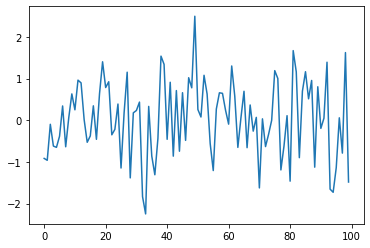

In [10]:
plt.plot(X)

### 压制线输出

您可能已经注意到，在图像之前，`[<matplotlib.lines.Line2D at 0x21cd490de08>]`这一行很烦人。这是因为`plot`函数实际上会产生输出。有时我们不希望显示输出，我们可以使用分号来实现这一点，如下所示。

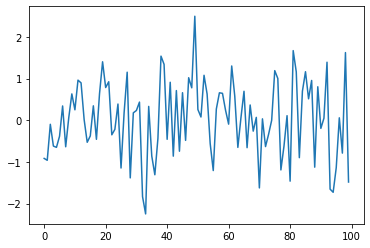

In [12]:
plt.plot(X);

### 增加轴标签

没有一个自重的定量分析师会留下一个没有标记坐标轴的图。这里有一些命令可以帮助您。

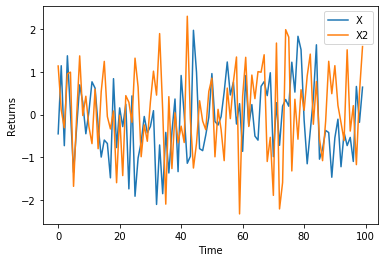

In [13]:
X = np.random.normal(0, 1, 100)
X2 = np.random.normal(0, 1, 100)

plt.plot(X);
plt.plot(X2);
plt.xlabel('Time') # The data we generated is unitless, but don't forget units in general.
plt.ylabel('Returns')
plt.legend(['X', 'X2']);

## 生成统计信息

让我们使用`numpy`来进行一些简单的统计。

In [14]:
np.mean(X)

-0.13410139632357723

In [15]:
np.std(X)

0.8557006364879415

## 获取真实的价格数据

随机采样的数据可以很好地测试想法，但让我们得到一些真实的数据。我们可以使用`get_pricing`来实现这一点。您可以使用上面讨论的`?`语法来获得关于`get_pricing`参数的更多信息。

In [1]:
from pandas_datareader import data
data=data.get_data_yahoo('MSFT','2012-01-01','2015-06-01')['Close']

我们的数据现在是一个dataframe。您可以看到datetime索引和带有不同价格数据的列。

In [2]:
data

Date
2012-01-03    26.770000
2012-01-04    27.400000
2012-01-05    27.680000
2012-01-06    28.110001
2012-01-09    27.740000
                ...    
2015-05-26    46.590000
2015-05-27    47.610001
2015-05-28    47.450001
2015-05-29    46.860001
2015-06-01    47.230000
Name: Close, Length: 857, dtype: float64

这是一个pandas dataframe，我们可以像这样建立索引来获得价格。有关pandas的更多信息，请[点击这里](http://pandas.pydata.org/pandas-docs/stable/10min.html)。

In [7]:
X = data

因为现在我们的数据中也有日期信息，所以我们为`.plot`提供了两个系列。`X.index`给出日期时间索引，`X.values`给出定价值。它们被用作X和Y坐标来构成一个图形。

D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


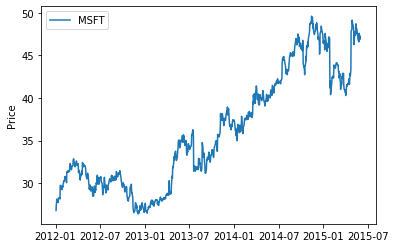

In [10]:
plt.plot(X.index, X.values)
plt.ylabel('Price')
plt.legend(['MSFT']);

我们可以得到真实数据的统计数据。

In [11]:
np.mean(X)

36.065087539868706

In [12]:
np.std(X)

6.698235005684992

## 从价格中获得回报率

我们可以使用`pct_change`函数来获得回报率。注意我们是如何在这样做之后删除第一个元素的，因为它将是`NaN`(什么也没有->会导致一个NaN的百分比)

In [16]:
R = X.pct_change()[1:]
R

Date
2012-01-04    0.023534
2012-01-05    0.010219
2012-01-06    0.015535
2012-01-09   -0.013163
2012-01-10    0.003605
                ...   
2015-05-26   -0.006610
2015-05-27    0.021893
2015-05-28   -0.003361
2015-05-29   -0.012434
2015-06-01    0.007896
Name: Close, Length: 856, dtype: float64

我们可以用直方图来表示收益分布。

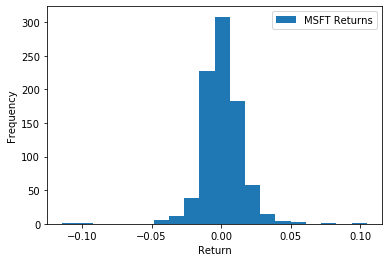

In [17]:
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['MSFT Returns']);

重新统计。

In [18]:
np.mean(R)

0.0007676424636097097

In [19]:
np.std(R)

0.01442155042192487

现在让我们倒回去，使用我们从微软的回报中估算出的统计数据，从正态分布中生成数据。我们将看到，我们有充分的理由怀疑微软的回报可能不是正态的，因为最终的正态分布看起来大不相同。

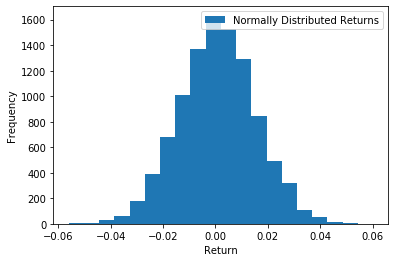

In [20]:
plt.hist(np.random.normal(np.mean(R), np.std(R), 10000), bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['Normally Distributed Returns']);

## 产生移动平均数

`pandas`有一些不错的工具，可以让我们生成滚动统计数据。这是一个例子。注意，前60天没有移动平均线，因为我们没有60天的数据来生成统计。

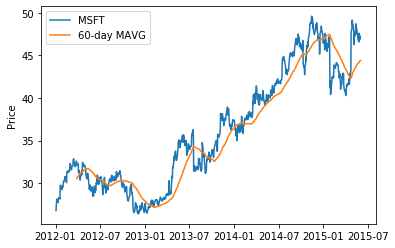

In [22]:
# Take the average of the last 60 days at each timepoint.
MAVG = X.rolling(60).mean()
plt.plot(X.index, X.values)
plt.plot(MAVG.index, MAVG.values)
plt.ylabel('Price')
plt.legend(['MSFT', '60-day MAVG']);